# 1. Import des librairies

In [278]:
#Import des librairies nécessaires
import pandas as pd #pour les dataframes
from tabulate import tabulate#pour les bordures dans les tableaux
import numpy as np #pour le calcul
import matplotlib.pyplot as plt #pour la visualisation (graphiques)
import seaborn as sns #pour la visualisation (graphiques)
import datetime as dt #pour la gestion des dates
import scipy.stats as st

# 2. Import du fichier CSV

In [296]:
# Chargement du fichier CSV dans un dataframe
arbres = pd.read_csv('p2-arbres-fr.csv', sep=';') # Importe le fichier CSV en tant compte du séparatuer ';' utilisé dans ce fichier au lieu du séparateur ',' habituel
arbres.head() # Affiche les 5 premières lignes du data frame

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


# 3. Nettoyage des données

## 3.1 Vérification de la quantité des données

In [297]:
# Nombre d'arbres et nombre d'attributs par arbre
arbres.shape # 200 137 arbres avec 18 attributs chacun

(200137, 18)

## 3.2 Traitement des valeurs manquantes

### 3.2.1 Vue d'ensemble

<AxesSubplot:title={'center':'Taux des valeurs manquantes par variable'}, ylabel='%'>

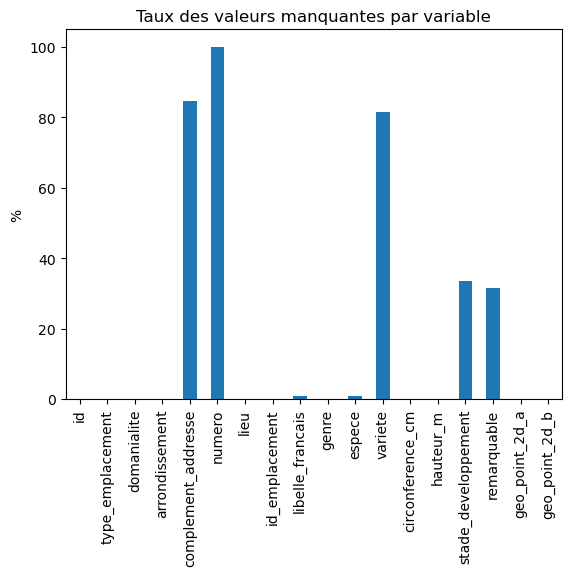

In [298]:
# Visualisation du taux de valeurs manquantes par variable
(arbres.isnull().sum()/arbres.shape[0]*100).plot(kind='bar', title='Taux des valeurs manquantes par variable', ylabel='%')

Au vue des taux de valeurs manquantes, il vaudrait mieux supprimer les colonnes ci-dessous : 
- complement_addresse : pas utile pour cette analyse (donc même pas besoin de corriger l'orthographe du mot "adresse")
- numero : presque 100% de valeurs manquantes
- variete : 80% de valeurs manquantes ; on peut utiliser "libelle_francais" qui correspond au nom commun des espèces
- Remarquable : cette variable ne semble pas très utile à exploiter

### 3.2.2 Suppression des colonnes avec un fort taux de valeurs manquantes

In [299]:
ls_colTodel = ['complement_addresse','numero','variete','remarquable'] # Liste les colonnes à supprimer
arbres = arbres.drop(ls_colTodel, axis=1) # Supprime les colonnes listées

In [300]:
arbres.isnull().sum() # Liste le nombre de valeurs manquantes par variable

id                         0
type_emplacement           0
domanialite                1
arrondissement             0
lieu                       0
id_emplacement             0
libelle_francais        1497
genre                     16
espece                  1752
circonference_cm           0
hauteur_m                  0
stade_developpement    67205
geo_point_2d_a             0
geo_point_2d_b             0
dtype: int64

### 3.2.3 Remplacement des valeurs manquantes de la domanialité

In [301]:
arbres.loc[arbres['domanialite'].isnull(),:]

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,geo_point_2d_a,geo_point_2d_b
197239,2020911,Arbre,NaN,PARIS 20E ARRDT,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,203006,Chimonanthe,Chimonanthus,praecox,35,4,JA,48.849547,2.41419


Regardons les arbres de l'emplacement "203006" dont le nom de lieu contient le mot "JARDIN"

In [302]:
arbres.loc[(arbres['id_emplacement']=='203006') & (arbres['lieu'].str.contains('JARDIN')),:] # Filtre sur les arbres similaires

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,geo_point_2d_a,geo_point_2d_b
16044,119131,Arbre,Jardin,PARIS 20E ARRDT,JARDIN FRIDA KAHLO / 18 RUE DE NOISY LE SEC,203006,Fevier,Gleditsia,triacanthos f. Inermis,20,0,NaN,48.872192,2.413152
16481,119612,Arbre,Jardin,PARIS 18E ARRDT,JARDIN D EOLE / 18 BIS RUE DU DEPARTEMENT,203006,Marronnier,Aesculus,x carnea,25,0,NaN,48.885914,2.365908
196422,2020067,Arbre,Jardin,PARIS 18E ARRDT,JARDIN ROSA LUXEMBOURG / 22 BIS RUE PAJOL,203006,Charme,Carpinus,betulus,25,0,J,48.888223,2.362946
197239,2020911,Arbre,NaN,PARIS 20E ARRDT,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,203006,Chimonanthe,Chimonanthus,praecox,35,4,JA,48.849547,2.414190


La domanialité manquante est donc "Jardin"

In [303]:
arbres.loc[197239, 'domanialite'] = 'Jardin' # Modifie la domanialité manquante

### 3.2.4 Valeurs manquantes du "genre"

Regardons les 16 valeurs dont le genre est manquant.

In [304]:
arbres.loc[arbres['genre'].isnull(),:]


,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,geo_point_2d_a,geo_point_2d_b
195404,2018848,Arbre,Jardin,PARIS 13E ARRDT,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,102027,NaN,NaN,NaN,0,0,NaN,48.821289,2.354485
195409,2018853,Arbre,Jardin,PARIS 13E ARRDT,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104005,NaN,NaN,NaN,0,0,NaN,48.821259,2.354242
195410,2018854,Arbre,Jardin,PARIS 13E ARRDT,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104006,NaN,NaN,NaN,0,0,NaN,48.821229,2.354212
195475,2018919,Arbre,Jardin,PARIS 13E ARRDT,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104030,NaN,NaN,NaN,0,0,NaN,48.821281,2.353322
195476,2018920,Arbre,Jardin,PARIS 13E ARRDT,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104031,NaN,NaN,NaN,0,0,NaN,48.821289,2.353228
195487,2018932,Arbre,Jardin,PARIS 13E ARRDT,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105006,NaN,NaN,NaN,0,0,NaN,48.821294,2.352001
195496,2018942,Arbre,Jardin,PARIS 13E ARRDT,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105017,NaN,NaN,NaN,0,0,NaN,48.821292,2.351425
195497,2018943,Arbre,Jardin,PARIS 13E ARRDT,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105019,NaN,NaN,NaN,0,0,NaN,48.821260,2.351363
195499,2018945,Arbre,Jardin,PARIS 13E ARRDT,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105022,NaN,NaN,NaN,0,0,NaN,48.821261,2.351296
195502,2018948,Arbre,Jardin,PARIS 13E ARRDT,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105025,NaN,NaN,NaN,0,0,NaN,48.821283,2.351094


Tous les arbres ont des circonférences et ou des hauteurs égales à O.
On peut donc on profiter pour supprimer toutes les données avec une de ces deux variables égales 0.

### 3.2.5 Valeur avec des circonférences ou des hauteurs à 0

In [305]:
# Vérifions les arbres dont la circonférence ou la hauteur est égale à 0
arbres.loc[(arbres['circonference_cm']==0) | (arbres['hauteur_m']==0),:].shape # Compte le nombre d'arbres à 0

(39585, 14)

In [306]:
# Il y en a 39 585. Il vaudrait mieux les suprrimer 
arbres = arbres[(arbres['circonference_cm']!=0)] #Prendre les arbres dont la ciconférence est différente 0 ; prendre ce qui nous intéresse plutôt que de supprimer ce qu'on ne veut pas
arbres = arbres[(arbres['hauteur_m']!=0)] #Suppression des arbres de hauteur O cm

Regardons à nouveau le nombre de valeurs manquantes

In [307]:
arbres.isnull().sum()

id                         0
type_emplacement           0
domanialite                0
arrondissement             0
lieu                       0
id_emplacement             0
libelle_francais        1358
genre                      0
espece                  1208
circonference_cm           0
hauteur_m                  0
stade_developpement    29931
geo_point_2d_a             0
geo_point_2d_b             0
dtype: int64

### 3.2.6 Valeur manquantes de "libelle_français", "espèces" et "stade de développement"

Le plus simple serait de remplacer ces valeurs manquantes pas "Autres"

In [308]:
# arbres.loc[arbres['libelle_francais'].isnull(),:]
arbres['libelle_francais'] = arbres['libelle_francais'].fillna("Autres")
arbres['espece'] = arbres['espece'].fillna("Autres")
arbres['stade_developpement'] = arbres['stade_developpement'].fillna("Autres")

Vérifions le nombre de valeurs manquantes à nouveau

In [309]:
arbres.isnull().sum()

id                     0
type_emplacement       0
domanialite            0
arrondissement         0
lieu                   0
id_emplacement         0
libelle_francais       0
genre                  0
espece                 0
circonference_cm       0
hauteur_m              0
stade_developpement    0
geo_point_2d_a         0
geo_point_2d_b         0
dtype: int64

## 3.3 Vérification des types de données

In [311]:
# Vérifions si le format des variables est le bon
arbres.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

Les données dont il faut corriger le format sont :
- "circonference_cm" : devrait être une décimale (float64) et non un entier (int64)
- "hauteur_m " : devrait être une décimale (float64) et non un entier (int64)

In [312]:
# int pour int64, str string, object, float pour float64
arbres['circonference_cm'] = (arbres['circonference_cm']).astype(float) # Change le format des circonférences en décimales
arbres['hauteur_m'] = (arbres['hauteur_m']).astype(float) # Change le format des hauteurs en décimales

In [313]:
# Vérifions le résultat
arbres.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
circonference_cm       float64
hauteur_m              float64
stade_developpement     object
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

## 3.4 Recherche de doublons

In [315]:
# Les doublons sont les arbres ayant des coordonnées géographiques identiques
arbres.loc[arbres[['geo_point_2d_a', 'geo_point_2d_b']].duplicated(keep=False),:]

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,geo_point_2d_a,geo_point_2d_b
12794,115338,Arbre,Jardin,PARIS 19E ARRDT,VOIE DF19,1,Peuplier,Populus,nigra,120.0,20.0,Autres,48.900332,2.386441
12795,115339,Arbre,Jardin,PARIS 19E ARRDT,VOIE DF19,2,Peuplier,Populus,nigra,100.0,20.0,Autres,48.900290,2.386442
12796,115340,Arbre,Jardin,PARIS 19E ARRDT,VOIE DF19,3,Peuplier,Populus,nigra,165.0,20.0,Autres,48.900253,2.386444
76385,195525,Arbre,PERIPHERIQUE,PARIS 19E ARRDT,VOIE DF/19,09VO19001,Peuplier,Populus,nigra,120.0,20.0,Autres,48.900332,2.386441
76386,195526,Arbre,PERIPHERIQUE,PARIS 19E ARRDT,VOIE DF/19,09VO19002,Peuplier,Populus,nigra,100.0,20.0,Autres,48.900290,2.386442
76387,195527,Arbre,PERIPHERIQUE,PARIS 19E ARRDT,VOIE DF/19,09VO19003,Peuplier,Populus,nigra,165.0,20.0,Autres,48.900253,2.386444
188269,2010572,Arbre,Jardin,BOIS DE VINCENNES,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20012,Platane,Platanus,x hispanica,195.0,18.0,A,48.839118,2.438810
188304,2010609,Arbre,Jardin,BOIS DE VINCENNES,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20023,Platane,Platanus,x hispanica,190.0,24.0,A,48.839118,2.438810


Supprimons les doublons

In [318]:
arbres = arbres.drop_duplicates(subset=['geo_point_2d_a', 'geo_point_2d_b'])
arbres.loc[arbres[['geo_point_2d_a', 'geo_point_2d_b']].duplicated(keep=False),:]

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,geo_point_2d_a,geo_point_2d_b


## 3.5 Gestion des outliers

### 3.5.1 Identification des outliers

#### 3.5.1.1 Changement de la mesure de l'épaisseur des arbres

Comme il est plus facile de se représenter l'épaisseur d'un arbre par son diamètre que par sa circonférence, transformons les circonférences en diamètres en les divisant par Pi (3,14).

In [319]:
arbres['circonference_cm']=round(arbres['circonference_cm']/3.14,2) # Divise les circonférences par 3,14 et arrondit le résultat à 2 chiffres après la virgule
arbres = arbres.rename(columns={'circonference_cm': 'diametre_cm'}) # Renomme la colonne des circonférences en colonnes des diamètres

In [408]:
arbres.head()

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,diametre_cm,hauteur_m,stade_developpement,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,6.37,5.0,Autres,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,20.70,8.0,A,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,28.66,10.0,A,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,19.11,8.0,A,48.857722,2.321006
8,99882,Arbre,Jardin,PARIS 16E ARRDT,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,802008,Sophora,Sophora,japonica,46.18,14.0,A,48.871990,2.275814


#### 3.5.1.2 Identification des outliers par la méthode "Describe"

In [320]:
arbres.describe()

,id,diametre_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,1.605480e+05,160548.000000,160548.000000,160548.000000,160548.000000
mean,3.826848e+05,30.892251,16.325977,48.855776,2.346143
std,5.216985e+05,239.032854,2200.866388,0.025876,0.049286
min,9.987400e+04,0.320000,1.000000,48.742290,2.210416
25%,1.873878e+05,15.920000,6.000000,48.836754,2.307640
50%,2.332975e+05,25.480000,10.000000,48.855138,2.348667
75%,2.772012e+05,39.810000,14.000000,48.874077,2.383126
max,2.023468e+06,79699.040000,881818.000000,48.911485,2.469759


On voit plusieurs outliers à supprimer.
Commencçons par le méthode interquartile en dessinant les boîtes à moustaches du diamètre et de le hauteur.

#### 3.5.1.3 Identification des outliers par les boîtes à moustache (boxplot)

C:\Users\sandr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diametre_cm'>

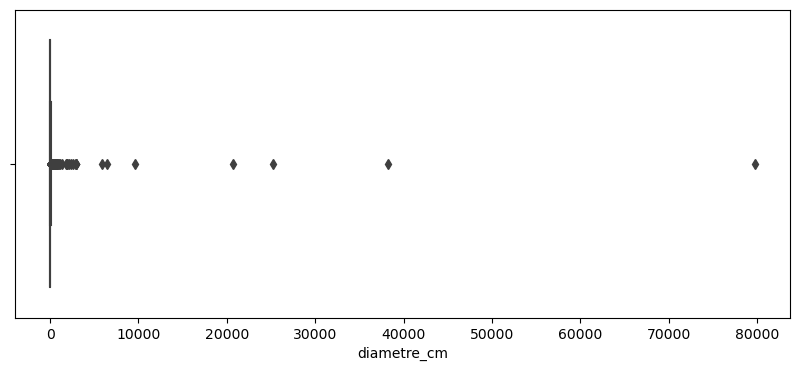

In [321]:
plt.figure(figsize=(10,4)) # Détermine la taille du graphique
sns.boxplot(arbres['diametre_cm']) # Dessine la boîte à moustache du diamètre
# plt.show()

On voit des outliers dont le diamètre approche 10 000 cm et au delà.

C:\Users\sandr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hauteur_m'>

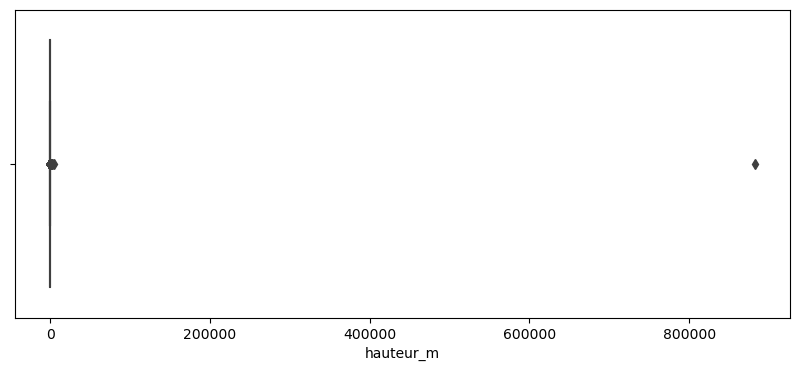

In [322]:
plt.figure(figsize=(10,4)) # Détermine la taille du graphique
sns.boxplot(arbres['hauteur_m']) # Dessine la boîte à moustache de la hauteur

On voit un outlier dont la hauteur dépasse 80 000 m.

### 3.5.2 Suppression des outliers avec la méthode "Interquratile (IQR)"

#### 3.5.2.1 Suppression des outliers de diamètre

In [323]:
# Calcul des Q1 et Q3
Q1 = arbres['diametre_cm'].quantile(0.25) # Calcule le premier quartile
Q3 = arbres['diametre_cm'].quantile(0.75) # Calcule le troisième quartile

# Calcul de l'IQR 
IQR = Q3 - Q1

# Détermination des limites inférieure et supérieure pour détecter les outliers
seuil_inferieur = Q1 - 1.5 * IQR
seuil_superieur = Q3 + 1.5 * IQR

# Filtre du DataFrame pour exclure les outliers de diamètre
arbres = arbres[(arbres['diametre_cm'] >= seuil_inferieur) & (arbres['diametre_cm'] <= seuil_superieur)].dropna()

#### 3.5.2.2 Suppression des outliers de hauteur

In [324]:
# Calcul des Q1 et Q3
Q1 = arbres['hauteur_m'].quantile(0.25) # Calcule le premier quartile
Q3 = arbres['hauteur_m'].quantile(0.75) # Calcule le troisième quartile

# Calcul de l'IQR
IQR = Q3 - Q1

# Détermination des limites inférieure et supérieure pour détecter les outliers
seuil_inferieur = Q1 - 1.5 * IQR
seuil_superieur = Q3 + 1.5 * IQR

# Filtre du DataFrame pour exclure les outliers de hauteur
arbres = arbres[(arbres['hauteur_m'] >= seuil_inferieur) & (arbres['hauteur_m'] <= seuil_superieur)].dropna()

### 3.5.3 Vérification du résultat

C:\Users\sandr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diametre_cm'>

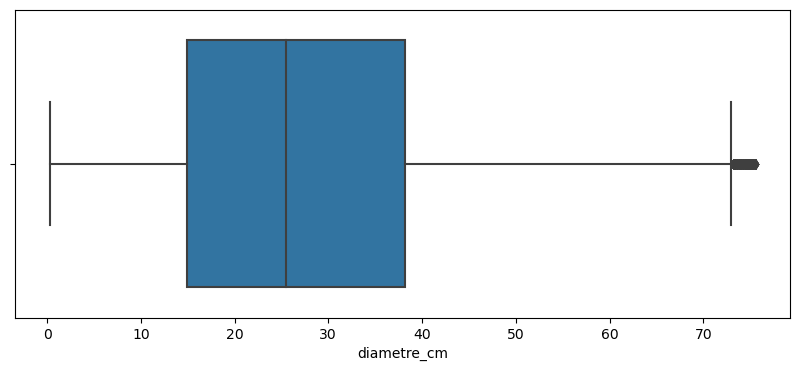

In [325]:
plt.figure(figsize=(10,4)) # Détermine la taille du graphique
sns.boxplot(arbres['diametre_cm']) # Dessine la boîte à moustache du diamètre

C:\Users\sandr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hauteur_m'>

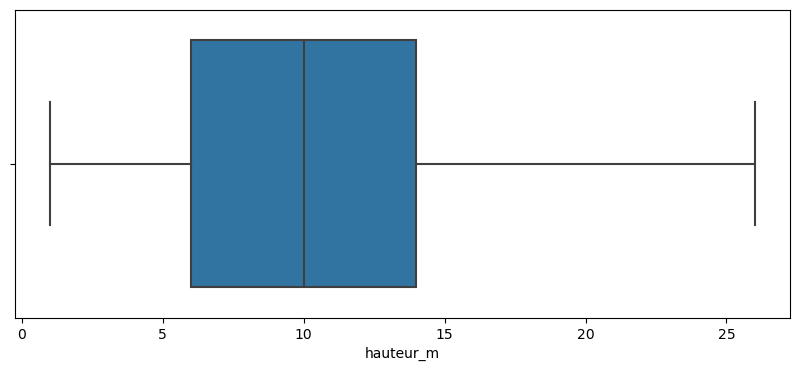

In [326]:
plt.figure(figsize=(10,4)) # Détermine la taille du graphique
sns.boxplot(arbres['hauteur_m']) # Dessine la boîte à moustache de la hauteur

Plusieurs outliers ont été supprimés mais regardons d'un peu plus près le résultat avec la méthode "describe".

In [327]:
arbres.describe()

,id,diametre_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,1.560090e+05,156009.000000,156009.000000,156009.000000,156009.000000
mean,3.807648e+05,27.965039,10.077489,48.856013,2.345943
std,5.177031e+05,16.198373,4.802422,0.025720,0.049358
min,9.987400e+04,0.320000,1.000000,48.742290,2.210416
25%,1.885900e+05,14.970000,6.000000,48.836973,2.307308
50%,2.338230e+05,25.480000,10.000000,48.855256,2.348491
75%,2.771860e+05,38.220000,14.000000,48.874227,2.383188
max,2.023468e+06,75.480000,26.000000,48.911485,2.469759


On voit un arbre d'un diamètre de 0,32 cm.
Il serait plus réaliste de considérer les arbres de moins de 5 cm de diamètre comme des outliers.

In [328]:
# Nombre d'arbres concernés
arbres.loc[(arbres['diametre_cm']<5) ,:].shape[0]

1858

In [329]:
arbres = arbres[(arbres['diametre_cm']>=5)] # Supprime les arbres de moins de 5 cm de diamètre

Vérifions le résultat

In [330]:
arbres.describe()

,id,diametre_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,1.541510e+05,154151.000000,154151.000000,154151.000000,154151.000000
mean,3.734948e+05,28.256533,10.154842,48.855972,2.345885
std,5.067376e+05,16.074953,4.764111,0.025718,0.049311
min,9.987400e+04,5.100000,1.000000,48.742290,2.210416
25%,1.887245e+05,15.920000,6.000000,48.836982,2.307247
50%,2.337550e+05,25.480000,10.000000,48.855199,2.348465
75%,2.767325e+05,38.220000,14.000000,48.874133,2.383142
max,2.023468e+06,75.480000,26.000000,48.911485,2.469759


Les minimums et maximums paraissent plus réalistes.
Nous pouvons à présent passer à l'analyse des données.

In [332]:
arbres.shape

(154151, 14)

# 4. Analyse de données

## 4.1 Analyse par domanialité

    domanialite  nb_arbres
0    Alignement      97980
1        Jardin      24863
2     CIMETIERE      15745
3         DASCO       5805
4  PERIPHERIQUE       5003
5        Autres       4755


C:\Users\sandr\AppData\Local\Temp\ipykernel_17196\2715896040.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a_top = a_top.append(autres, ignore_index=True) # Fusionne le top 5 et "Atures"


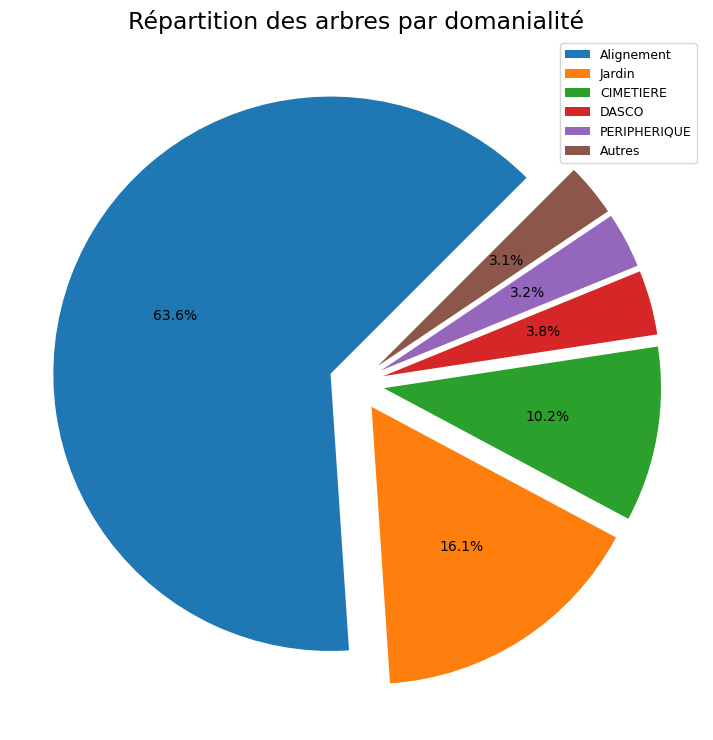

In [392]:
a = arbres.groupby("domanialite")['id'].count().reset_index() # Regroupe les données par domanialité
a.columns = ['domanialite','nb_arbres'] # Renomme les colonnes dunouvea dataframe
a = a.sort_values('nb_arbres', ascending=False) # Trie le nombre d'arbres par ordre décroissant
n_total= a['nb_arbres'].sum() # Calcule le nombre total d'arbres
top = 5 # Fixe à 5 le nombre de variables de domanialité les plus grandes à afficher
a_top = a.nlargest(top,'nb_arbres') # Créer un nouveau dataframe avec les 5 plus grandes domanialités en nombre d'arbres
n_top = a_top['nb_arbres'].sum() # Calcule le nombre d'arbres de ce top 5
autres = {'domanialite': 'Autres', 'nb_arbres': n_total-n_top} # Crée un dataframe "Autres" pour regrouper les domanialités hors du top 5
a_top = a_top.append(autres, ignore_index=True) # Fusionne le top 5 et "Atures"
print(a_top) # Afficher le résultat
# Diagramme en secteurs
eclatement = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # Faire éclater la première et la dernière section
plt.figure(figsize=(12,9)) # Détermine la taille du graphique
plt.pie(a_top['nb_arbres'], explode=eclatement, autopct='%1.1f%%', startangle=45) # Dessiner un diagramme en secteur
plt.legend(a_top['domanialite'], loc='upper right', fontsize=9) # Formate la légende
plt.title('Répartition des arbres par domanialité', fontsize=17) # Formate le titre du graphique
plt.show() # Affiche le graphique

63,6% des arbres sont en alignement donc, en termes d'équipements, il faudra privilégier les nacelles montés sur un véhicule.
Par ailleurs, la partie "Jardin" inclut probablement des jardins privés, à exclure de l'entretien, sauf dispositions contraires.

## 4.2 Analyse par stade de développement

Le site de la ville de Paris permet de traduite les lettres qui repésentent les stades de développement des arbres, à savoir
- A pour "Adulte"
- J pour "Jeune"
- JA pour "Jeune_Adulte"
- M pour "Mature"
Auquel il faut ajouter la catégories "Autres" pour les données manquantes

  stade_developpement  nb_arbres
0              Adulte      61640
3         JeuneAdulte      34444
1              Autres      28296
2               Jeune      25569
4              Mature       4202


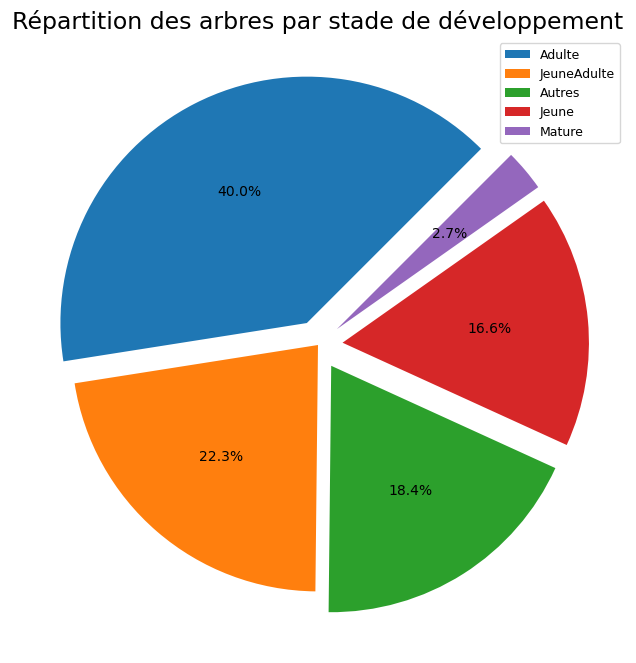

In [391]:
a = arbres.groupby("stade_developpement")['id'].count().reset_index() # Regroupe les arbres par stade de développement
a.columns = ['stade_developpement','nb_arbres'] # Renomme les colonnes
a['stade_developpement'] = a['stade_developpement'].str.replace('A', 'Adulte') # Définit les noms des stades de développement
a['stade_developpement'] = a['stade_developpement'].str.replace('J', 'Jeune') # Définit les noms des stades de développement
a['stade_developpement'] = a['stade_developpement'].str.replace('JA', 'Jeune_Adulte') # Définit les noms des stades de développement
a['stade_developpement'] = a['stade_developpement'].str.replace('M', 'Mature') # Définit les noms des stades de développement
a['stade_developpement'] = a['stade_developpement'].str.replace('Adulteutres', 'Autres') # Définit les noms des stades de développement
a = a.sort_values('nb_arbres', ascending=False) # Trie le nombre d'arbres par ordre décroissant
print(a)
# Diagramme en secteurs
eclatement = (0.1, 0, 0.1, 0.1, 0.1)  # Prépare l'éclatement la première et la dernière section
plt.figure(figsize=(9,8)) # Définirt la taille du graphique
plt.pie(a['nb_arbres'], explode=eclatement, autopct='%1.1f%%', startangle=45) # Formate le graphique
plt.legend(a['stade_developpement'], loc='upper right', fontsize=9) # Formate la légende
plt.title('Répartition des arbres par stade de développement', fontsize=17) # Formate le titre
plt.show() # Affiche le graphique

## 4.3 Analyse par arrondissement

### 4.3.1 Nombre d'arbres par arrondissement

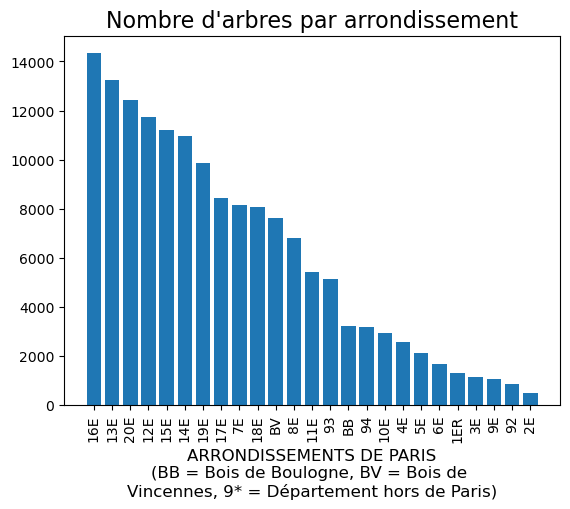

In [370]:
a = arbres.groupby("arrondissement")['id'].count().reset_index() # Crée un data qui regroupe des arbres par arrondissement
a.columns = ['arrondissement','nb_arbres'] # Renomme les colonnes du nouveau data frame
a = a.sort_values('nb_arbres', ascending=False)# Classe le data frame par ordre décroissant de nombre  d'arbre par arrondissement
a['arrondissement'] = a['arrondissement'].str.replace('PARIS ', '') # Raccourcit les noms des arrondissements
a['arrondissement'] = a['arrondissement'].str.replace(' ARRDT', '') # Raccourcit les noms des arrondissements
a['arrondissement'] = a['arrondissement'].str.replace('BOIS DE BOULOGNE', 'BB') # Raccourcit les noms des arrondissements
a['arrondissement'] = a['arrondissement'].str.replace('BOIS DE VINCENNES', 'BV') # Raccourcit les noms des arrondissements
a['arrondissement'] = a['arrondissement'].str.replace('HAUTS-DE-SEINE', '92') # Raccourcit les noms des départements
a['arrondissement'] = a['arrondissement'].str.replace('SEINE-SAINT-DENIS', '93') # Raccourcit les noms des départements
a['arrondissement'] = a['arrondissement'].str.replace('VAL-DE-MARNE', '94') # Raccourcit les noms des départements
#print(a)
plt.bar(a['arrondissement'], a['nb_arbres']) # Trace un histogramme
plt.xticks(rotation=90) # Oriente verticalement les étiquettes de l'axe des abscisses
plt.title("Nombre d'arbres par arrondissement", fontsize=16) # Ajoute un titre au graphique
plt.xlabel('ARRONDISSEMENTS DE PARIS\n(BB = Bois de Boulogne, BV = Bois de \nVincennes, 9* = Département hors de Paris)', fontsize=12) # Ajoute un nom à l'axe des abscisses
plt.show() # Affiche le graphique

On pourrait allouer les équipes en fonction du nombre d'arbres par arrondissement. Mais, il serait plus judidicieux de les allouer la densité d'arbres par arrondissement.

### 4.3.2 Densité d'arbres par arrondissement

   arrondissement  nb_arbres  superficie_ha  densite
2             20E      12414            598    20.76
8              7E       8165            409    19.96
5             14E      10956            564    19.43
1             13E      13264            715    18.55
3             12E      11732            637    18.42
0             16E      14329            791    18.12
11             8E       6800            388    17.53
17             4E       2586            160    16.16
7             17E       8441            567    14.89
12            11E       5417            367    14.76
6             19E       9846            679    14.50
9             18E       8088            601    13.46
4             15E      11223            848    13.23
16            10E       2945            289    10.19
21             3E       1158            117     9.90
18             5E       2145            254     8.44
19             6E       1701            215     7.91
10             BV       7640            995   

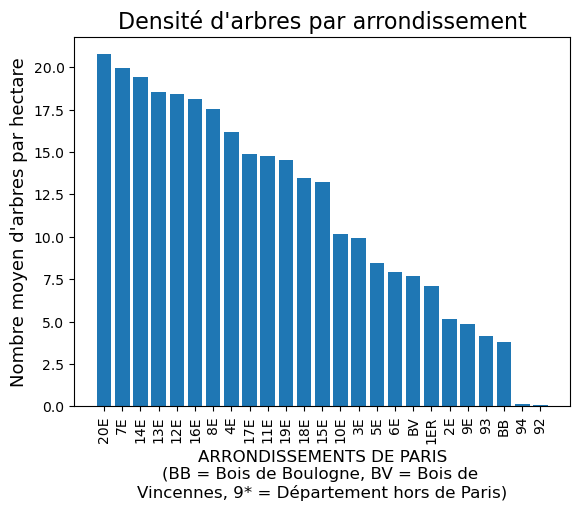

In [371]:
# Nous avons pu télécharger des données sur les surfaces des arrondissements sous fore de fichier CSV
arrondissements = pd.read_csv('arrondissements.csv', sep=';') # Importe le fichier CSV avec les surfaces des arrondissements en hectares
a_plus= pd.concat([a.set_index('arrondissement'),arrondissements.set_index('arrondissement')], axis=1).reset_index(drop=False).rename(columns={'index': 'arrondissement '}) # Fusionne le data frame des surfaces avec celui du nombre d'arbres par arrondissement
a_plus['densite'] = round(a_plus['nb_arbres']/a_plus['superficie_ha'],2) # Calcule la densité par arrondissement, c'est à dire le nombre d'arbres par hectare
a_plus = a_plus.sort_values('densite', ascending=False) # Trie les données par ordre de densité décroissante
print(a_plus) # Afficher les données
plt.bar(a_plus['arrondissement'], a_plus['densite']) # Trace un histogramme
plt.xticks(rotation=90) # Oriente verticalement les étiquettes de l'axe des abscisses
plt.title("Densité d'arbres par arrondissement", fontsize=16) # Ajoute un titre au graphique
plt.xlabel('ARRONDISSEMENTS DE PARIS\n(BB = Bois de Boulogne, BV = Bois de \nVincennes, 9* = Département hors de Paris)', fontsize=12) # Ajoute un nom à l'axe des abscisses
plt.ylabel("Nombre moyen d'arbres par hectare", fontsize=13) # Ajoute un nom à l'axe des coordonnées
plt.show() # Affiche le graphique

La densité d'arbre par arrondissement indique un autre priorité différent mais plus pertinent.

### 4.3.3 Diamètre moyen des arbres par arrondissement

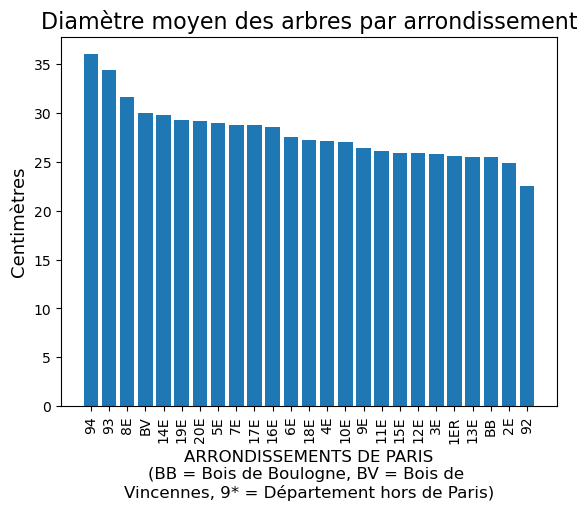

In [373]:
a = arbres.groupby("arrondissement")['diametre_cm'].mean().reset_index() # Calcule les diamètres moyens par arrondissement
a.columns = ['arrondissement','d_moyenne'] # Renomme les colonnes du nouveau data frame
a['d_moyenne'] = round(a['d_moyenne'],2) # Arrondit les diamètres moyens à 2 chiffres après la virgule                                            
a = a.sort_values('d_moyenne', ascending=False).reset_index() # Trie les données par ordre de diamètre moyen décroissant
a['arrondissement'] = a['arrondissement'].str.replace('PARIS ', '') # Raccourcit les noms des arrondissements
a['arrondissement'] = a['arrondissement'].str.replace(' ARRDT', '') # Raccourcit les noms des arrondissements
a['arrondissement'] = a['arrondissement'].str.replace('BOIS DE BOULOGNE', 'BB') # Raccourcit les noms des arrondissements
a['arrondissement'] = a['arrondissement'].str.replace('BOIS DE VINCENNES', 'BV') # Raccourcit les noms des arrondissements
a['arrondissement'] = a['arrondissement'].str.replace('HAUTS-DE-SEINE', '92') # Raccourcit les noms des départements
a['arrondissement'] = a['arrondissement'].str.replace('SEINE-SAINT-DENIS', '93') # Raccourcit les noms des départements
a['arrondissement'] = a['arrondissement'].str.replace('VAL-DE-MARNE', '94') # Raccourcit les noms des départements
plt.bar(a['arrondissement'], a['d_moyenne']) # Trace un histogramme
plt.xticks(rotation=90) # Oriente verticalement les étiquettes de l'axe des abscisses
plt.title('Diamètre moyen des arbres par arrondissement', fontsize=16) # Ajoute un titre au graphique
plt.xlabel('ARRONDISSEMENTS DE PARIS\n(BB = Bois de Boulogne, BV = Bois de \nVincennes, 9* = Département hors de Paris)', fontsize=12) #Ajoute un nom à l'axe des abscisses
plt.ylabel('Centimètres', fontsize=13) # Ajoute un nom à l'axe des coordonnées
plt.show() # Affiche le graphique

Outils à adapter pour l'élagage

### 4.3.4 Hauteur moyenne des arbres par arrondissement

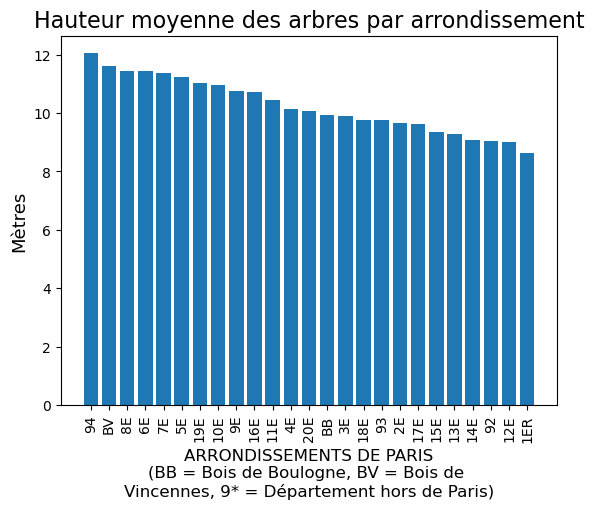

In [374]:
a = arbres.groupby("arrondissement")['hauteur_m'].mean().reset_index() #Calcule les hauteurs moyennes par arrondissement
a.columns = ['arrondissement','h_moyenne'] #Renomme les colonnes du nouveau data frame
a['h_moyenne'] = round(a['h_moyenne'],2) #Arrondit les hauteurs moyennes à 2 chiffres après la virgule                                            
a = a.sort_values('h_moyenne', ascending=False).reset_index() # Trie les données par ordre de hauteur moyenne décroissante
a['arrondissement'] = a['arrondissement'].str.replace('PARIS ', '') # Raccourcit les noms des arrondissements
a['arrondissement'] = a['arrondissement'].str.replace(' ARRDT', '') # Raccourcit les noms des arrondissements
a['arrondissement'] = a['arrondissement'].str.replace('BOIS DE BOULOGNE', 'BB') # Raccourcit les noms des arrondissements
a['arrondissement'] = a['arrondissement'].str.replace('BOIS DE VINCENNES', 'BV') # Raccourcit les noms des arrondissements
a['arrondissement'] = a['arrondissement'].str.replace('HAUTS-DE-SEINE', '92') # Raccourcit les noms des départements
a['arrondissement'] = a['arrondissement'].str.replace('SEINE-SAINT-DENIS', '93') # Raccourcit les noms des départements
a['arrondissement'] = a['arrondissement'].str.replace('VAL-DE-MARNE', '94') # Raccourcit les noms des départements
#print(a)
plt.bar(a['arrondissement'], a['h_moyenne']) #Trace un histogramme
plt.xticks(rotation=90) #Oriente verticalement les étiquettes de l'axe des abscisses
plt.title('Hauteur moyenne des arbres par arrondissement', fontsize=16) #Ajoute un titre au graphique
plt.xlabel('ARRONDISSEMENTS DE PARIS\n(BB = Bois de Boulogne, BV = Bois de \nVincennes, 9* = Département hors de Paris)', fontsize=12) #Ajoute un nom à l'axe des abscisses
plt.ylabel('Mètres', fontsize=13) #Ajoute un nom à l'axe des coordonnées
plt.show()#Affiche le graphique

Outils à adapter pour l'élagage

## 4.4 Analyse par lieu

In [376]:
a = arbres.groupby("lieu")['id'].count().reset_index() # Crée un data frame avec le nombre d'arbres par espèces
print ("Nombre de lieux : ", a.shape[0]) # Affiche le nombre de lieux

Nombre de lieux :  5377


Vu le nombre important de lieux différents, il vaudrait mieux regarder les lieux avec le plus grand nombre d'arbres

                                                 lieu  nb_arbres  diametre_cm  \
3204      PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE       1479        36.10   
3203                         PARC DES BUTTES CHAUMONT       1345        35.72   
160                         AVENUE DES CHAMPS ELYSEES       1227        30.62   
2940                          JARDIN DU CHAMP DE MARS       1225        28.39   
2862                       INSEP / AVENUE DU TREMBLAY       1169        22.06   
3202                                    PARC DE BERCY       1121        23.66   
81                                   AVENUE DAUMESNIL       1079        27.70   
3755                             ROUTE DE LA PYRAMIDE       1016        27.15   
3209                                  PARC MONTSOURIS        996        35.23   
3205  PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE        922        28.38   

      hauteur_m  
3204      14.76  
3203      11.81  
160       10.58  
2940       9.84  
2862       8.99  


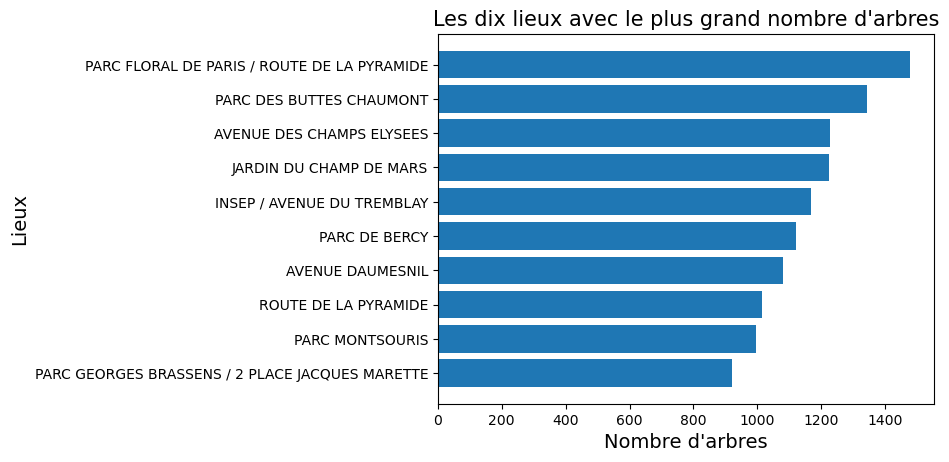

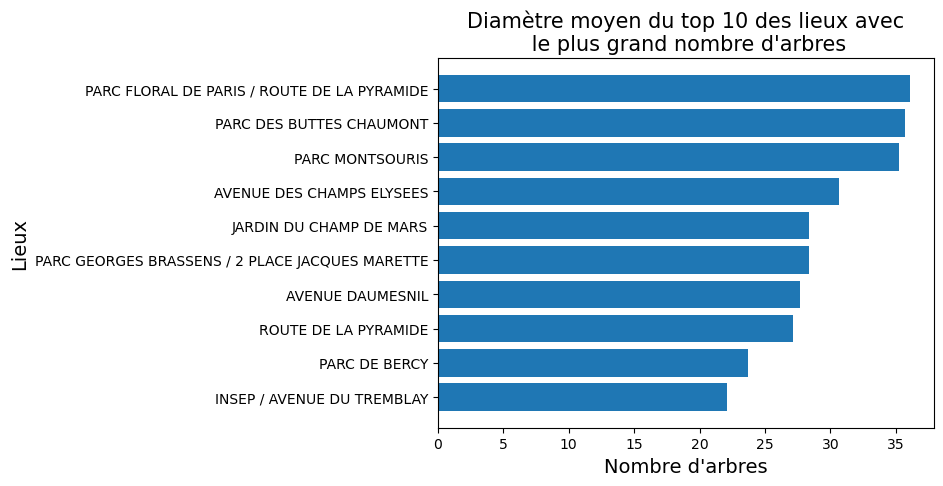

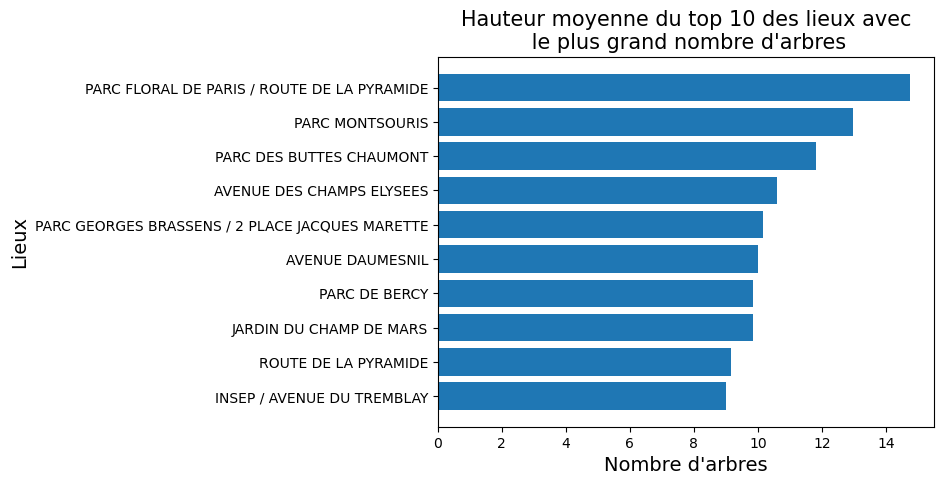

In [385]:
a = arbres.groupby("lieu") # Regroupe les données par lieu
a = a.agg({'id': 'count', 'diametre_cm': 'mean', 'hauteur_m': 'mean'}).reset_index() # Crée un dataframe avec les nombres d'arbres, les diamètres moyens et les hauteurs moyennes par lieu
a['diametre_cm'] = round(a['diametre_cm'],2) # Arrondit les diamètres moyens à 2 chiffres après la virgule
a['hauteur_m'] = round(a['hauteur_m'],2) # Arrondit les hauteurs moyennes à 2 chiffres après la virgule
a.columns = ['lieu','nb_arbres','diametre_cm','hauteur_m'] # Renomme les colonnes
top = 10 # Fixe le nombre de plus grandes valeurs à regarder
a_top = a.nlargest(top,'nb_arbres') # Crée un dataframe avec le top 10 en nombre d'arbres
print(a_top) # Affiche le résulat

ls_colTodraw = ['nb_arbres', 'diametre_cm', 'hauteur_m'] # Liste les variables chiffrées à représenter
dict_title = {'nb_arbres':"Les dix lieux avec le plus grand nombre d'arbres", 'diametre_cm':"Diamètre moyen du top 10 des lieux avec\n le plus grand nombre d'arbres", 'hauteur_m':"Hauteur moyenne du top 10 des lieux avec\n le plus grand nombre d'arbres"} # Liste les titres dans un dictionnaire en fonction des données représentées
for i in ls_colTodraw: # Fait une boucle sur la liste des variables chiffrées à représenter
    a_top = a_top.sort_values(i, ascending=True) # Trie les données
    plt.barh(a_top['lieu'], a_top[i]) # Crée une graphique à barres horizontales
    #plt.xticks(rotation=90)
    plt.title(dict_title[i], fontsize=15) # Affiche les titres des graphiques
    plt.xlabel("Nombre d'arbres", fontsize=14) # Affiche les titres des axes des abscisses
    plt.ylabel("Lieux", fontsize=14) # Affiche les titres des axes des ordonnées
    plt.show() # Affiche les graphiques
    

## 4.5 Analyse par espèce d'arbre

En ce qui concerne les espèces d'arbres, la variable "libelle_francais" est plus explite, donc facile lire du grand public

In [379]:
a = arbres.groupby("libelle_francais")['id'].count().reset_index() # Crée un data frame avec le nombre d'arbres par espèces
# a.columns = ['espece','nb_arbres'] # Renomme les colonnes du data frame
print ("Nombre d'espèces différentes d'arbres : ", a.shape[0]) # Affiche le nombre d'espèces différentes d'arbres
# libelles=arbres.loc[arbres['libelle_francais'].isnull(),:]

Nombre d'espèces différentes d'arbres :  163


Vu le nombre important d'espèces différentes, il vaudrait mieux uen analyse similaire à celle des lieux

         libelle_francais  nb_arbres  diametre_cm  hauteur_m
122               Platane      37094        33.16      12.50
89             Marronnier      21758        34.29      11.18
156               Tilleul      17283        28.00      10.28
58                 Erable      12188        28.37      10.08
148               Sophora      10346        27.62       9.92
65                  Frêne       3430        23.80       8.92
92            Micocoulier       3258        23.25       7.85
98   Noisetier de Byzance       2738        19.96       8.00
116              Peuplier       2618        37.94      14.38
119                   Pin       2610        29.64      10.21


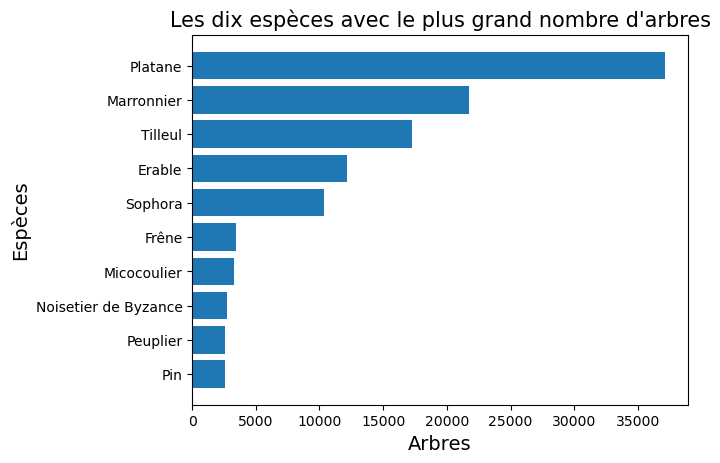

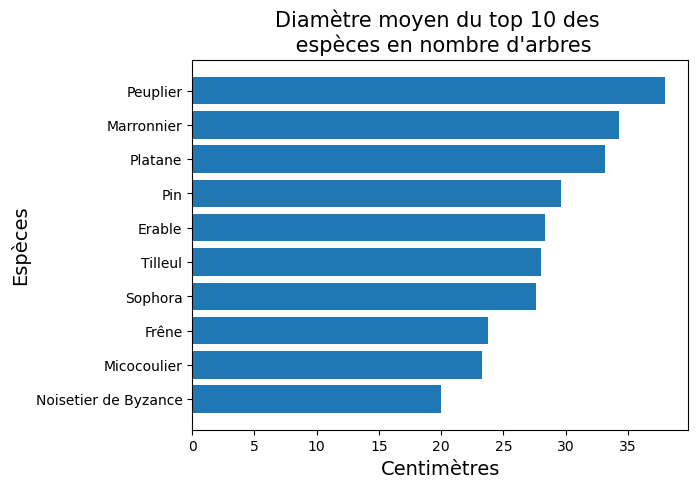

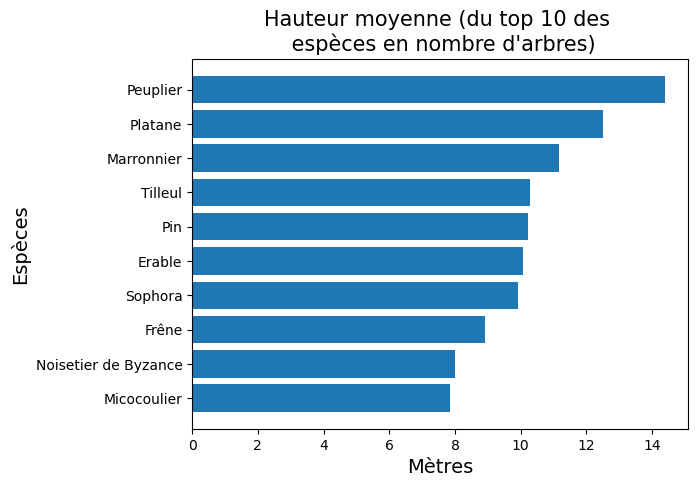

In [394]:
a = arbres.groupby("libelle_francais") # Regroupe les données par lieu
a = a.agg({'id': 'count', 'diametre_cm': 'mean', 'hauteur_m': 'mean'}).reset_index() # Crée un dataframe avec les nombres d'arbres, les diamètres moyens et les hauteurs moyennes par lieu
a['diametre_cm'] = round(a['diametre_cm'],2) # Arrondit les diamètres moyens à 2 chiffres après la virgule
a['hauteur_m'] = round(a['hauteur_m'],2) # Arrondit les hauteurs moyennes à 2 chiffres après la virgule
a.columns = ['libelle_francais','nb_arbres','diametre_cm','hauteur_m'] # Renomme les colonnes
top = 10 # Fixe le nombre de plus grandes valeurs à regarder
a_top = a.nlargest(top,'nb_arbres') # Crée un dataframe avec le top 10 en nombre d'arbres
print(a_top) # Affiche le résulat

ls_colTodraw = ['nb_arbres', 'diametre_cm', 'hauteur_m'] # Liste les variables chiffrées à représenter
dict_title = {'nb_arbres':"Les dix espèces avec le plus grand nombre d'arbres", 'diametre_cm':"Diamètre moyen du top 10 des \n espèces en nombre d'arbres", 'hauteur_m':"Hauteur moyenne (du top 10 des \n espèces en nombre d'arbres)"} # Liste les titres dans un dictionnaire en fonction des données représentées
dict_abscisse = {'nb_arbres':"Arbres", 'diametre_cm':"Centimètres", 'hauteur_m':"Mètres"} # Liste les titres dans un dictionnaire en fonction des données représentées
for i in ls_colTodraw: # Fait une boucle sur la liste des variables chiffrées à représenter
    a_top = a_top.sort_values(i, ascending=True) # Trie les données
    plt.barh(a_top['libelle_francais'], a_top[i]) # Crée une graphique à barres horizontales
    #plt.xticks(rotation=90)
    plt.title(dict_title[i], fontsize=15) # Affiche les titres des graphiques
    plt.xlabel(dict_abscisse[i], fontsize=14) # Affiche les titres des axes des abscisses
    plt.ylabel("Espèces", fontsize=14) # Affiche les titres des axes des ordonnées
    plt.show() # Affiche les graphiques
    

Les platanes représentant la majorité des arbres, la période de leur entretien dépendra des saisons.

Pour aller plus loin, ce serait intéressant de croiser cette info avec la répartition des tailles par arrondissements (Heatmap)